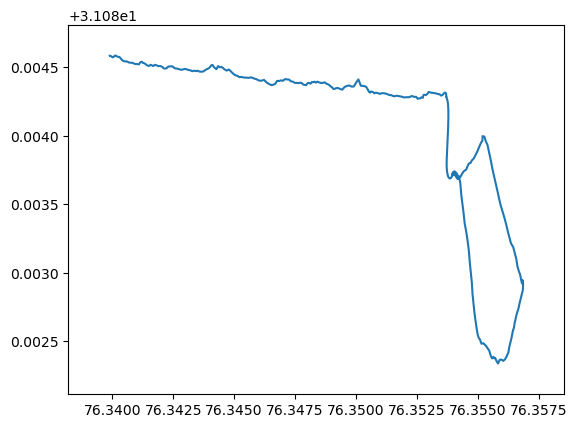

In [1]:
import gpxpy
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1
%matplotlib inline
from pykalman import KalmanFilter
with open('3.gpx') as fh:
    gpx_file = gpxpy.parse(fh)
segment =gpx_file.tracks[0].segments[0]
coords = pd.DataFrame([
    {'lat':p.latitude,
     'lon':p.longitude,
     'ele':p.elevation,
     'time':p.time} for p in segment.points])
coords.set_index('time', drop=True, inplace=True)
plt.plot(coords['lon'].values, coords['lat'].values)

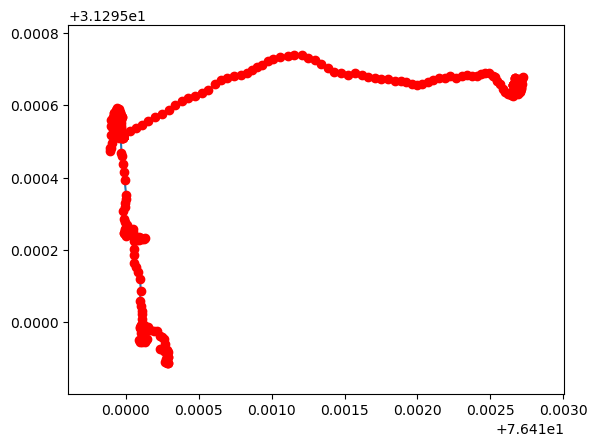

In [2]:
plt.plot(coords['lon'].values, coords['lat'].values)
plt.plot(coords['lon'].values, coords['lat'].values, 'ro')

In [5]:
coords.head()

,lat,lon,ele
time,,,
2022-12-24 10:34:11+00:00,31.084584,76.339897,243.295
2022-12-24 10:34:11+00:00,31.084584,76.339897,243.295
2022-12-24 10:34:11+00:00,31.084584,76.339897,243.295
2022-12-24 10:34:11+00:00,31.084584,76.339897,243.295
2022-12-24 10:34:11+00:00,31.084584,76.339897,243.295


In [3]:
import numpy as np
from rdp import rdp 

495 points reduced to 7!


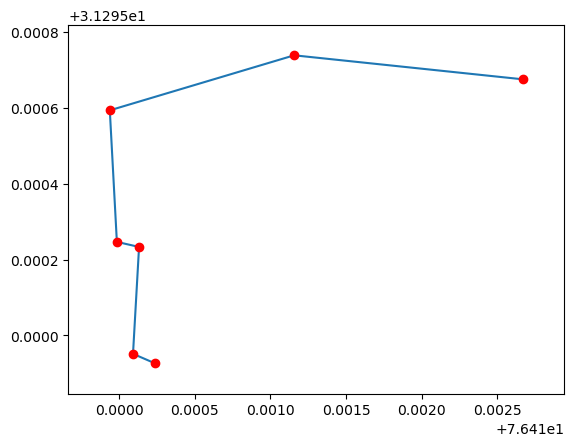

In [4]:
simple_coords =rdp(coords[['lon', 'lat']].values, epsilon=1e-4)
print("{} points reduced to {}!".format(coords.shape[0], simple_coords.shape[0]))
plt.plot(simple_coords[:, 0], simple_coords[:, 1])
plt.plot(simple_coords[:, 0], simple_coords[:, 1], 'ro');

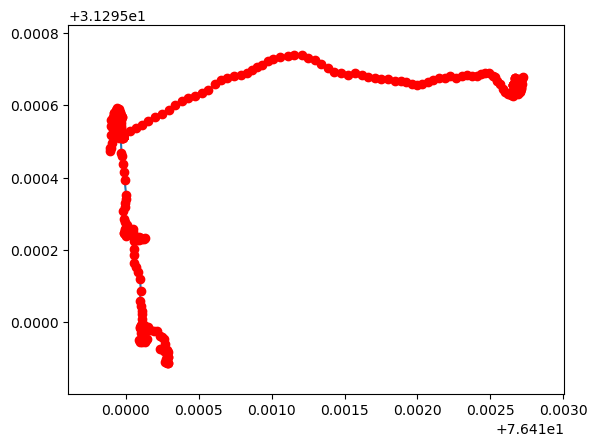

In [5]:
fig=plt.figure()
plt.plot(coords['lon'].values, coords['lat'].values)
plt.plot(coords['lon'].values, coords['lat'].values, 'ro')

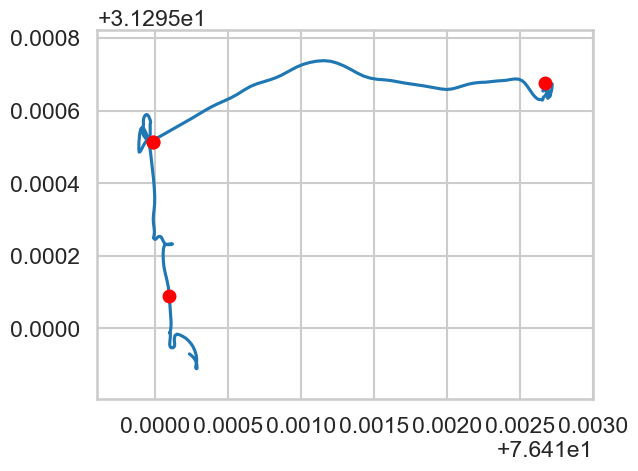

In [18]:
plt.plot(coords['lon'].values, coords['lat'].values)
plt.plot(coords['lon'].values[::150], coords['lat'].values[::150], 'ro');

In [6]:
coords =pd.DataFrame([{'idx': i,
                       'lat': p.latitude,
                       'lon': p.longitude,
                       'ele': p.elevation,
                       'speed': p.speed,
                       'time': p.time} for i, p in enumerate(segment.points)])
coords.set_index('time', inplace=True)
coords.head()

,idx,lat,lon,ele,speed
time,,,,,
2023-01-12 08:02:57+00:00,0,31.295675,76.412670,274.9,0.143
2023-01-12 08:02:58+00:00,1,31.295675,76.412668,275.0,0.102
2023-01-12 08:02:59+00:00,2,31.295677,76.412668,274.9,0.000
2023-01-12 08:03:00+00:00,3,31.295672,76.412668,275.1,0.186
2023-01-12 08:03:01+00:00,4,31.295667,76.412670,274.9,0.131


In [8]:
pip install gpxutils

In [9]:
pip install pykalman

Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [8]:
coords = pd.DataFrame([{'idx': i,
                        'lat': p.latitude, 
                        'lon': p.longitude, 
                        'ele': p.elevation,
                        'speed': p.speed,
                        'time': p.time} for i, p in enumerate(segment.points)])
coords.set_index('time', inplace=True)
coords.head(2)

,idx,lat,lon,ele,speed
time,,,,,
2023-01-12 08:02:57+00:00,0,31.295675,76.412670,274.9,0.143
2023-01-12 08:02:58+00:00,1,31.295675,76.412668,275.0,0.102


In [9]:
coords.index = np.round(coords.index.astype(np.int64), -9).astype('datetime64[ns]')

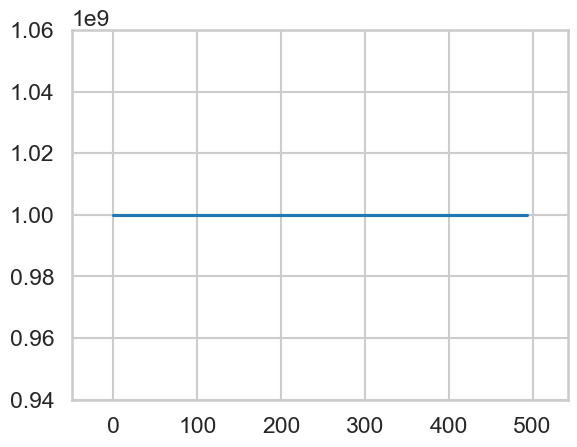

In [10]:
plt.plot(np.diff(coords.index));

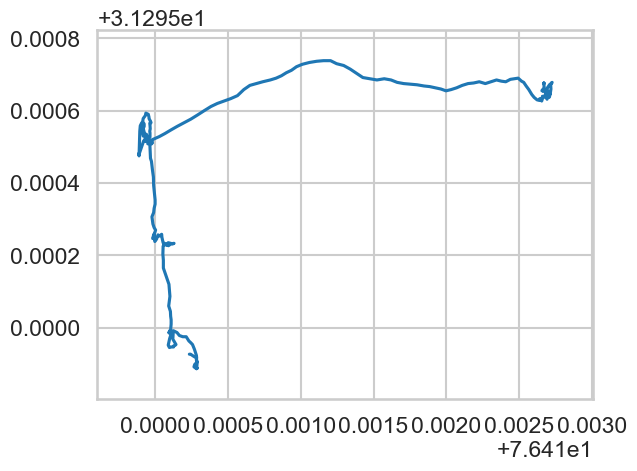

In [11]:
measurements = np.ma.masked_invalid(coords[['lon', 'lat', 'ele']].values)

plt.plot(measurements[:,0], measurements[:,1])
filled_coords = coords.fillna(method='pad').loc[coords.ele.isnull()]
plt.plot(filled_coords['lon'].values, filled_coords['lat'].values, 'ro');

In [12]:
F = np.array([[1, 0, 0, 1, 0, 0],
              [0, 1, 0, 0, 1, 0],
              [0, 0, 1, 0, 0, 1],
              [0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0]])

R = np.diag([1e-4, 1e-4, 100])**2

initial_state_mean = np.hstack([measurements[0, :], 3*[0.]])
initial_state_covariance = np.diag([1e-4, 1e-4, 50, 1e-6, 1e-6, 1e-6])**2

kf = KalmanFilter(transition_matrices=F, 
                  observation_matrices=H, 
                  observation_covariance=R,
                  initial_state_mean=initial_state_mean,
                  initial_state_covariance=initial_state_covariance,
                  em_vars=['transition_covariance'])

In [13]:
kf = kf.em(measurements, n_iter=1000)

In [14]:
Q = np.array([[  3.17720723e-09,  -1.56389148e-09,  -2.41793770e-07,
                 2.29258935e-09,  -3.17260647e-09,  -2.89201471e-07],
              [  1.56687815e-09,   3.16555076e-09,   1.19734906e-07,
                 3.17314157e-09,   2.27469595e-09,  -2.11189940e-08],
              [ -5.13624053e-08,   2.60171362e-07,   4.62632068e-01,
                 1.00082746e-07,   2.81568920e-07,   6.99461902e-05],
              [  2.98805710e-09,  -8.62315114e-10,  -1.90678253e-07,
                 5.58468140e-09,  -5.46272629e-09,  -5.75557899e-07],
              [  8.66285671e-10,   2.97046913e-09,   1.54584155e-07,
                 5.46269262e-09,   5.55161528e-09,   5.67122163e-08],
              [ -9.24540217e-08,   2.09822077e-07,   7.65126136e-05,
                 4.58344911e-08,   5.74790902e-07,   3.89895992e-04]])
Q = 0.5*(Q + Q.T) 
kf.transition_covariance = Q

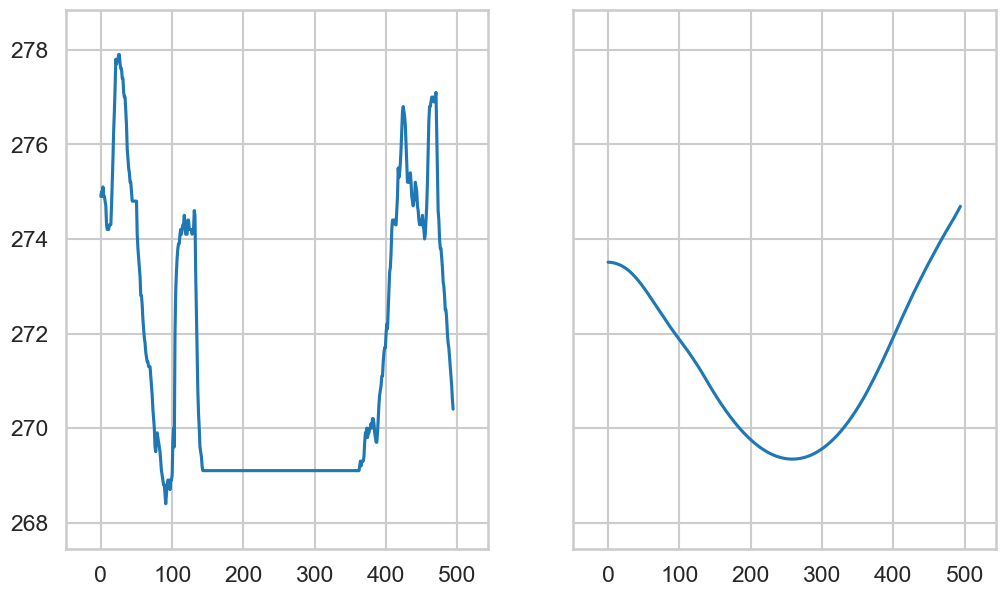

In [15]:
state_means, state_vars = kf.smooth(measurements)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 7))
ax1.plot(measurements[:,2]), ax2.plot(state_means[:,2]);

In [16]:
coords.loc[:, ['lon', 'lat', 'ele']] = state_means[:,:3]
orig_coords = coords.loc[~coords['idx'].isnull()].set_index('idx')

for i, p in enumerate(segment.points):
    p.speed = None
    p.elevation = orig_coords.at[float(i),'ele']
    p.longitude = orig_coords.at[float(i),'lon']
    p.latitude = orig_coords.at[float(i),'lat']
    
segment.get_uphill_downhill()

UphillDownhill(uphill=5.346233759566985, downhill=4.164549473432771)

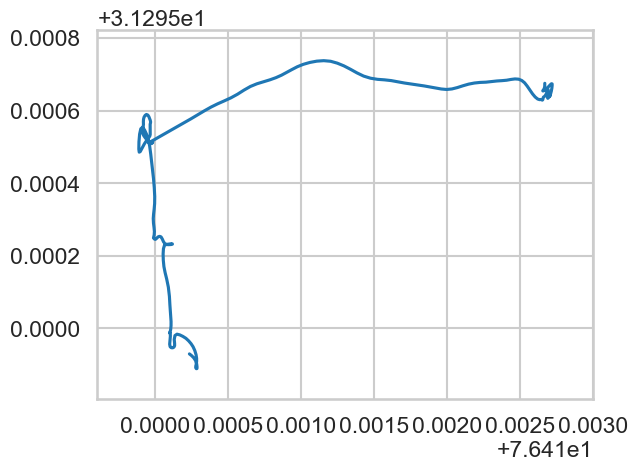

In [17]:
plt.plot(coords['lon'].values, coords['lat'].values)

In [39]:
coords.head(20)

,idx,lat,lon,ele,speed
time,,,,,
2022-12-27 07:51:15,0,31.069012,75.921921,207.373162,None
2022-12-27 07:51:16,1,31.069015,75.921927,207.372868,None
2022-12-27 07:51:17,2,31.069019,75.921940,207.371879,None
2022-12-27 07:51:18,3,31.069021,75.921957,207.370398,None
2022-12-27 07:51:19,4,31.069022,75.921971,207.368617,None
2022-12-27 07:51:20,5,31.069022,75.921981,207.366638,None
2022-12-27 07:51:21,6,31.069020,75.921987,207.364496,None
2022-12-27 07:51:22,7,31.069018,75.921990,207.362175,None
2022-12-27 07:51:23,8,31.069016,75.921991,207.359635,None


In [53]:
import gpxpy.gpx

In [54]:
import csv

In [55]:
coords.to_csv(r"C:\Users\HP\Documents\gpx\3.csv")

In [27]:
coords

,idx,lat,lon,ele,speed
time,,,,,
2023-03-22 05:43:52,0,30.656198,76.682823,246.960137,0.000
2023-03-22 05:43:53,1,30.656190,76.682826,246.964722,0.449
2023-03-22 05:43:54,2,30.656171,76.682833,246.970683,0.654
2023-03-22 05:43:55,3,30.656146,76.682847,246.978038,0.947
2023-03-22 05:43:56,4,30.656114,76.682871,246.986740,1.252
...,...,...,...,...,...
2023-03-22 05:46:21,149,30.666150,76.700812,255.789109,17.272
2023-03-22 05:46:22,150,30.666240,76.700962,255.855767,17.665
2023-03-22 05:46:23,151,30.666330,76.701112,255.922288,17.642


In [36]:
pip install gpx_converter

Note: you may need to restart the kernel to use updated packages.


In [56]:
from gpx_converter import Converter

In [57]:
Converter(input_file='3.csv').csv_to_gpx(lats_colname='lat',
                                         longs_colname='lon',
                                         output_file='output.gpx')

True